In [128]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('./'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

./prediction1.csv
./prediction2.csv
./prediction3.csv
./prediction4.csv
./README.md
./titanic- one-hot encoding.ipynb
./titanic-label Encoder.ipynb
./.ipynb_checkpoints\titanic- one-hot encoding-checkpoint.ipynb
./.ipynb_checkpoints\titanic-label Encoder-checkpoint.ipynb
./data\gender_submission.csv
./data\test.csv
./data\train.csv


#### Read CSV

In [129]:
#df_train_o = pd.read_csv('/kaggle/titanic/data/train.csv')
#df_test_o = pd.read_csv('/kaggle/titanic/data/test.csv')
df_train_o = pd.read_csv('./data/train.csv')
df_test_o = pd.read_csv('./data/test.csv')

In [130]:
df_train_o

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [131]:
df_test_o

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


#### Embarked: Port of Embarkation

#### Get the number of NULL in train set

In [132]:
df_train_o.isnull().sum(axis = 0)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [133]:
df_test_o.isnull().sum(axis = 0)

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

### Drop PassengerId, Name (too specific), Cabin (too many NULL) 

In [134]:
df_train = df_train_o.drop(columns=['PassengerId', 'Cabin', 'Name'])
df_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,female,35.0,1,0,113803,53.1000,S
4,0,3,male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,211536,13.0000,S
887,1,1,female,19.0,0,0,112053,30.0000,S
888,0,3,female,NaN,1,2,W./C. 6607,23.4500,S
889,1,1,male,26.0,0,0,111369,30.0000,C


In [135]:
df_train.isnull().sum(axis = 0)

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Embarked      2
dtype: int64

In [136]:
df_train.mode()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0.0,3.0,male,24.0,0.0,0.0,1601,8.05,S
1,NaN,NaN,NaN,NaN,NaN,NaN,347082,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,CA. 2343,NaN,NaN


In [137]:
df_train.mean()

Survived     0.383838
Pclass       2.308642
Age         29.699118
SibSp        0.523008
Parch        0.381594
Fare        32.204208
dtype: float64

In [138]:
df_train.median()

Survived     0.0000
Pclass       3.0000
Age         28.0000
SibSp        0.0000
Parch        0.0000
Fare        14.4542
dtype: float64

#### Do so for test.csv

In [139]:
df_test = df_test_o.drop(columns=['PassengerId', 'Cabin','Name'])
df_test

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,3,male,34.5,0,0,330911,7.8292,Q
1,3,female,47.0,1,0,363272,7.0000,S
2,2,male,62.0,0,0,240276,9.6875,Q
3,3,male,27.0,0,0,315154,8.6625,S
4,3,female,22.0,1,1,3101298,12.2875,S
...,...,...,...,...,...,...,...,...
413,3,male,NaN,0,0,A.5. 3236,8.0500,S
414,1,female,39.0,0,0,PC 17758,108.9000,C
415,3,male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S
416,3,male,NaN,0,0,359309,8.0500,S


### Feature engineering

#### NULL value -> (removal, replace by mean/median/-1)
#### cat -> num (frequency, ordinal)

In [140]:
from sklearn import preprocessing

In [141]:
values = {"Embarked": 'S', "Age": 28}
df_train2 = df_train.fillna(value=values)

In [143]:
df_train2.isnull().sum(axis=0)

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

#### Do so for test.csv

In [145]:
df_test2 = df_test.fillna(value=values)
df_test2 = df_test2.fillna({"Fare": 7.89})
df_test2.isnull().sum(axis=0)

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

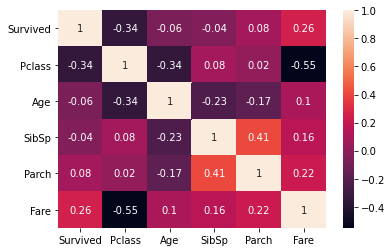

In [146]:
import seaborn as sns
import matplotlib.pyplot as plt

matrix = df_train2.corr().round(2)
sns.heatmap(matrix, annot=True)
plt.show()
# categorical features excluded


In [147]:
def printHeatmap(df):
    matrix = df.corr().round(2)
    fig, ax = plt.subplots(figsize=(10,10))   
    sns.heatmap(matrix, annot=True, ax=ax)
    plt.show()

#### Extract title from name and extract isMs

In [148]:
# Reference: https://www.kaggle.com/code/sergioortiz/titanic-competition-data-exploration-1/notebook
def multipleReplace(text, wordDic):
    for key in wordDic:
        if text.lower()==key.lower():
            text=wordDic[key]
            break
    return text

def normaliseTitle(title):
    wordDic = {
    'Mlle': 'Miss',
    'Ms': 'Mrs',
    'Mrs':'Mrs',
    'Master':'IMP',
    'Mme': 'Mrs',
    'Lady': 'IMP',
    'Countess': 'IMP',
    'Capt': 'IMP',
    'Col': 'IMP',
    'Dona': 'Miss',
    'Don': 'Mr',
    'Dr': 'IMP',
    'Major': 'IMP',
    'Rev': 'IMP',
    'Sir': 'IMP',
    'Jonkheer': 'IMP',
    }     
    title=multipleReplace(title,wordDic)
    return title

def extractTitleFromName(name):
    pos_point=name.find('.')
    if pos_point == -1: return ""
    wordList=name[0:pos_point].split(" ")
    if len(wordList)<=0: return ""
    title=wordList[len(wordList)-1]
    normalisedTitle=normaliseTitle(title)
    return normalisedTitle

# Get a list with different titles
titleList=(df_train_o['Name'].apply(lambda x: extractTitleFromName(x)))
df_train2['Title'] = titleList

In [149]:
df_train2['IsMs']=(df_train2["Title"]).apply(lambda x: 1 if x=='Mrs' or x == 'Miss' else 0)

In [150]:
df_train2

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,IsMs
0,0,3,male,22.0,1,0,A/5 21171,7.2500,S,Mr,0
1,1,1,female,38.0,1,0,PC 17599,71.2833,C,Mrs,1
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss,1
3,1,1,female,35.0,1,0,113803,53.1000,S,Mrs,1
4,0,3,male,35.0,0,0,373450,8.0500,S,Mr,0
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,211536,13.0000,S,IMP,0
887,1,1,female,19.0,0,0,112053,30.0000,S,Miss,1
888,0,3,female,28.0,1,2,W./C. 6607,23.4500,S,Miss,1
889,1,1,male,26.0,0,0,111369,30.0000,C,Mr,0


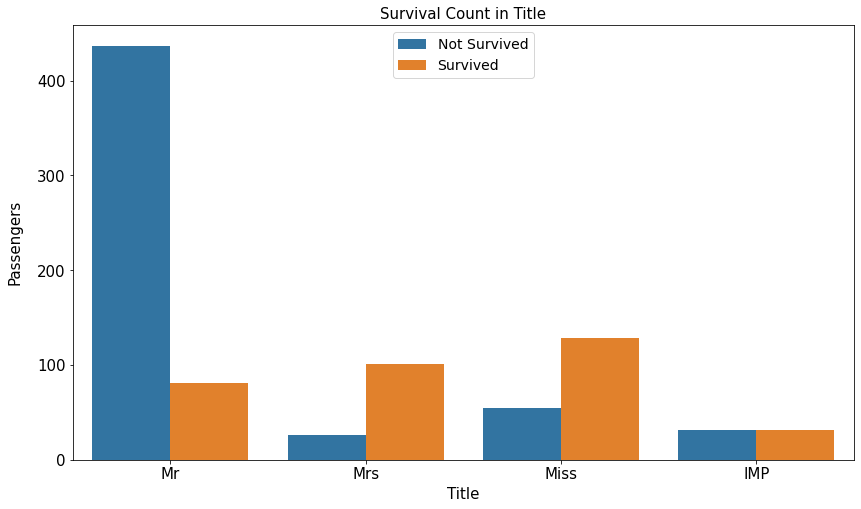

Mr      518
Miss    184
Mrs     127
IMP      62
Name: Title, dtype: int64


In [151]:
def cat_plot(feature, df_train):
    fig = plt.figure(figsize = (14, 8))
    sns.countplot(x=feature, hue='Survived', data=df_train)
    
    plt.xlabel(feature, size=15, labelpad=5)
    plt.ylabel('Passengers', size=15, labelpad=15)    
    plt.tick_params(axis='x', labelsize=15)
    plt.tick_params(axis='y', labelsize=15)
    plt.legend(['Not Survived', 'Survived'], loc='upper center', prop={'size': 14})
    plt.title('Survival Count in {}'.format(feature), size=15)
    plt.show()
    
    print(df_train[feature].value_counts())
    
cat_plot('Title', df_train2)

In [152]:
df_train2.Pclass.replace({1:'A' , 2: 'B', 3: 'C'} , inplace =True)
df_train2.Sex.replace({'male': 1 , 'female':0} , inplace =True)
df_train2

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,IsMs
0,0,C,1,22.0,1,0,A/5 21171,7.2500,S,Mr,0
1,1,A,0,38.0,1,0,PC 17599,71.2833,C,Mrs,1
2,1,C,0,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss,1
3,1,A,0,35.0,1,0,113803,53.1000,S,Mrs,1
4,0,C,1,35.0,0,0,373450,8.0500,S,Mr,0
...,...,...,...,...,...,...,...,...,...,...,...
886,0,B,1,27.0,0,0,211536,13.0000,S,IMP,0
887,1,A,0,19.0,0,0,112053,30.0000,S,Miss,1
888,0,C,0,28.0,1,2,W./C. 6607,23.4500,S,Miss,1
889,1,A,1,26.0,0,0,111369,30.0000,C,Mr,0


#### Do so for test.csv

In [153]:
titleList=(df_test_o['Name'].apply(lambda x: extractTitleFromName(x)))
df_test2['Title'] = titleList
df_test2['IsMs']=(df_test2["Title"]).apply(lambda x: 1 if x=='Mrs' or x == 'Miss' else 0)
df_test2.Pclass.replace({1:'A' , 2: 'B', 3: 'C'} , inplace =True)
df_test2.Sex.replace({'male': 1 , 'female':0} , inplace =True)
df_test2

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,IsMs
0,C,1,34.5,0,0,330911,7.8292,Q,Mr,0
1,C,0,47.0,1,0,363272,7.0000,S,Mrs,1
2,B,1,62.0,0,0,240276,9.6875,Q,Mr,0
3,C,1,27.0,0,0,315154,8.6625,S,Mr,0
4,C,0,22.0,1,1,3101298,12.2875,S,Mrs,1
...,...,...,...,...,...,...,...,...,...,...
413,C,1,28.0,0,0,A.5. 3236,8.0500,S,Mr,0
414,A,0,39.0,0,0,PC 17758,108.9000,C,Miss,1
415,C,1,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S,Mr,0
416,C,1,28.0,0,0,359309,8.0500,S,Mr,0


#### SibSp has lowest correlation with Survived
#### Sex and Fare, Pclass are higher 
#### Pclass has high relationship with Fare

### Add more features

In [154]:
df_train2['IsAlone']=(df_train2["SibSp"]+df_train2["Parch"]).apply(lambda x: 0 if x>0 else 1)
df_test2['IsAlone']=(df_test2["SibSp"]+df_test2["Parch"]).apply(lambda x: 0 if x>0 else 1)

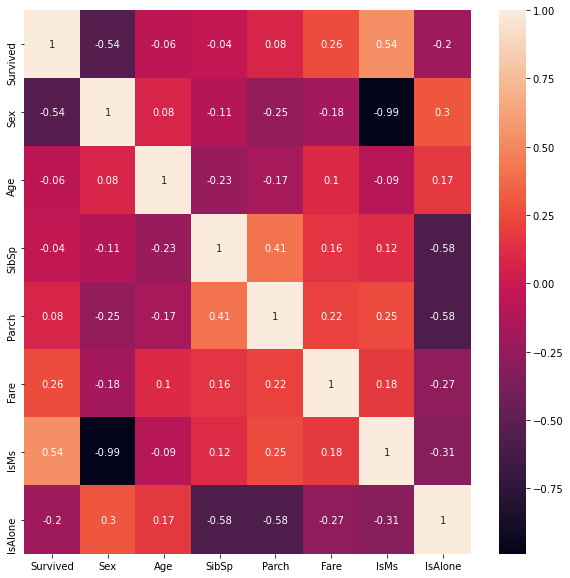

In [155]:
printHeatmap(df_train2)

In [156]:
df_train3 = df_train2.drop(columns=['Ticket'])
df_train3.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,IsMs,IsAlone
0,0,C,1,22.0,1,0,7.2500,S,Mr,0,0
1,1,A,0,38.0,1,0,71.2833,C,Mrs,1,0
2,1,C,0,26.0,0,0,7.9250,S,Miss,1,1
3,1,A,0,35.0,1,0,53.1000,S,Mrs,1,0
4,0,C,1,35.0,0,0,8.0500,S,Mr,0,1


In [157]:
df_test3 = df_test2.drop(columns=['Ticket'])
df_test3.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,IsMs,IsAlone
0,C,1,34.5,0,0,7.8292,Q,Mr,0,1
1,C,0,47.0,1,0,7.0000,S,Mrs,1,0
2,B,1,62.0,0,0,9.6875,Q,Mr,0,1
3,C,1,27.0,0,0,8.6625,S,Mr,0,1
4,C,0,22.0,1,1,12.2875,S,Mrs,1,0


In [158]:
cat_cols = ['Pclass', 'Embarked', 'Title']
df_train4 = pd.get_dummies(df_train3 , columns=cat_cols)
df_train4

,Survived,Sex,Age,SibSp,Parch,Fare,IsMs,IsAlone,Pclass_A,Pclass_B,Pclass_C,Embarked_C,Embarked_Q,Embarked_S,Title_IMP,Title_Miss,Title_Mr,Title_Mrs
0,0,1,22.0,1,0,7.2500,0,0,0,0,1,0,0,1,0,0,1,0
1,1,0,38.0,1,0,71.2833,1,0,1,0,0,1,0,0,0,0,0,1
2,1,0,26.0,0,0,7.9250,1,1,0,0,1,0,0,1,0,1,0,0
3,1,0,35.0,1,0,53.1000,1,0,1,0,0,0,0,1,0,0,0,1
4,0,1,35.0,0,0,8.0500,0,1,0,0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,1,27.0,0,0,13.0000,0,1,0,1,0,0,0,1,1,0,0,0
887,1,0,19.0,0,0,30.0000,1,1,1,0,0,0,0,1,0,1,0,0
888,0,0,28.0,1,2,23.4500,1,0,0,0,1,0,0,1,0,1,0,0
889,1,1,26.0,0,0,30.0000,0,1,1,0,0,1,0,0,0,0,1,0


In [159]:
df_test4 = pd.get_dummies(df_test3 , columns=cat_cols)
df_test4

,Sex,Age,SibSp,Parch,Fare,IsMs,IsAlone,Pclass_A,Pclass_B,Pclass_C,Embarked_C,Embarked_Q,Embarked_S,Title_IMP,Title_Miss,Title_Mr,Title_Mrs
0,1,34.5,0,0,7.8292,0,1,0,0,1,0,1,0,0,0,1,0
1,0,47.0,1,0,7.0000,1,0,0,0,1,0,0,1,0,0,0,1
2,1,62.0,0,0,9.6875,0,1,0,1,0,0,1,0,0,0,1,0
3,1,27.0,0,0,8.6625,0,1,0,0,1,0,0,1,0,0,1,0
4,0,22.0,1,1,12.2875,1,0,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1,28.0,0,0,8.0500,0,1,0,0,1,0,0,1,0,0,1,0
414,0,39.0,0,0,108.9000,1,1,1,0,0,1,0,0,0,1,0,0
415,1,38.5,0,0,7.2500,0,1,0,0,1,0,0,1,0,0,1,0
416,1,28.0,0,0,8.0500,0,1,0,0,1,0,0,1,0,0,1,0


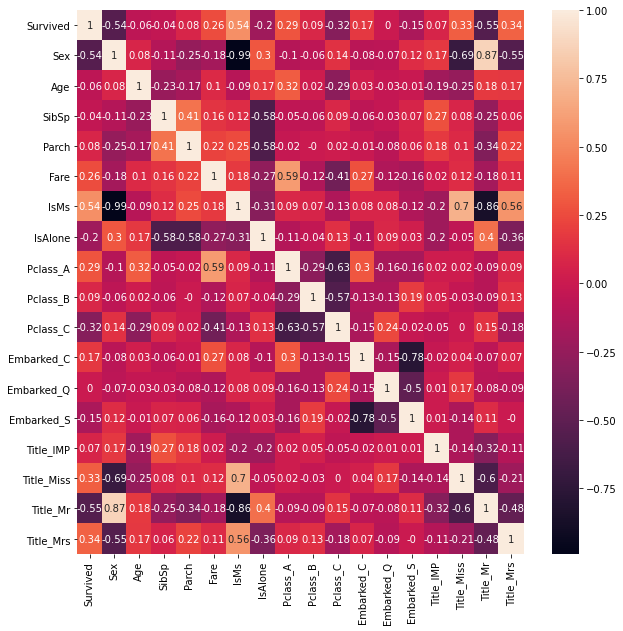

In [160]:
printHeatmap(df_train4)

### Handling outliers

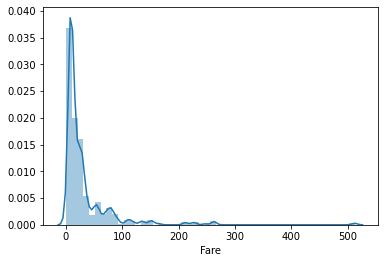

In [161]:
sns.distplot(df_train4['Fare'])

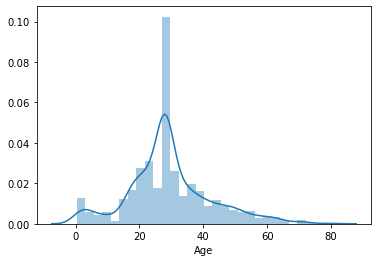

In [162]:
sns.distplot(df_train4['Age'])

In [163]:
df_train4[df_train4['Fare'] > 250]

,Survived,Sex,Age,SibSp,Parch,Fare,IsMs,IsAlone,Pclass_A,Pclass_B,Pclass_C,Embarked_C,Embarked_Q,Embarked_S,Title_IMP,Title_Miss,Title_Mr,Title_Mrs
27,0,1,19.0,3,2,263.0000,0,0,1,0,0,0,0,1,0,0,1,0
88,1,0,23.0,3,2,263.0000,1,0,1,0,0,0,0,1,0,1,0,0
258,1,0,35.0,0,0,512.3292,1,1,1,0,0,1,0,0,0,1,0,0
311,1,0,18.0,2,2,262.3750,1,0,1,0,0,1,0,0,0,1,0,0
341,1,0,24.0,3,2,263.0000,1,0,1,0,0,0,0,1,0,1,0,0
438,0,1,64.0,1,4,263.0000,0,0,1,0,0,0,0,1,0,0,1,0
679,1,1,36.0,0,1,512.3292,0,0,1,0,0,1,0,0,0,0,1,0
737,1,1,35.0,0,0,512.3292,0,1,1,0,0,1,0,0,0,0,1,0
742,1,0,21.0,2,2,262.3750,1,0,1,0,0,1,0,0,0,1,0,0


#### Remove outliers in Fare and FamilySize

In [164]:
df_train5 = df_train4[df_train4['Fare'] < 250]
df_train5

,Survived,Sex,Age,SibSp,Parch,Fare,IsMs,IsAlone,Pclass_A,Pclass_B,Pclass_C,Embarked_C,Embarked_Q,Embarked_S,Title_IMP,Title_Miss,Title_Mr,Title_Mrs
0,0,1,22.0,1,0,7.2500,0,0,0,0,1,0,0,1,0,0,1,0
1,1,0,38.0,1,0,71.2833,1,0,1,0,0,1,0,0,0,0,0,1
2,1,0,26.0,0,0,7.9250,1,1,0,0,1,0,0,1,0,1,0,0
3,1,0,35.0,1,0,53.1000,1,0,1,0,0,0,0,1,0,0,0,1
4,0,1,35.0,0,0,8.0500,0,1,0,0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,1,27.0,0,0,13.0000,0,1,0,1,0,0,0,1,1,0,0,0
887,1,0,19.0,0,0,30.0000,1,1,1,0,0,0,0,1,0,1,0,0
888,0,0,28.0,1,2,23.4500,1,0,0,0,1,0,0,1,0,1,0,0
889,1,1,26.0,0,0,30.0000,0,1,1,0,0,1,0,0,0,0,1,0


In [165]:
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler, Normalizer

In [166]:
minmaxScaler = MinMaxScaler().fit(df_train5.drop(columns=['Survived']))
arr_train_scaled = minmaxScaler.transform(df_train5.drop(columns=['Survived']))
arr_train_scaled.shape

(882, 17)

#### Scale test data

In [167]:
arr_test_scaled = minmaxScaler.transform(df_test4)
arr_test_scaled.shape

(418, 17)

## Model training

#### Select features

In [168]:
features_selected = ['Pclass', 'Sex', 'Fare', 'Embarked', 'IsMs', 'IsAlone', 'FamilySize', 'hasSibSp' , 'hasParch']
features_not_selected = ["Ticket"]

In [169]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC


from sklearn.model_selection import cross_val_score

In [170]:
dtc = DecisionTreeClassifier(random_state=12)

rfc = RandomForestClassifier(random_state=12)

nn = MLPClassifier(solver='lbfgs', alpha=1,hidden_layer_sizes=(15,), random_state=1)

logR = LogisticRegression(max_iter=30000)

svc = SVC(C=4)

kernel = 1.0 * RBF(1.0)
gpc = GaussianProcessClassifier(kernel=kernel, random_state=0)

In [171]:
y = df_train5['Survived']
X = arr_train_scaled

In [172]:
print(X.shape)
print(y.shape)

(882, 17)
(882,)


#### Decision Tree Classifier

In [173]:
cross_val_score(dtc, X, y, cv=4)

array([0.73755656, 0.80090498, 0.79545455, 0.77272727])

#### Random Forest Classifier

In [62]:
cross_val_score(rfc, X, y, cv=4)# added familysize, isAlone

array([0.77130045, 0.82959641, 0.83408072, 0.86486486])

In [70]:
cross_val_score(rfc, X, y, cv=4)# added isAlone only

array([0.76233184, 0.83856502, 0.81165919, 0.85135135])

In [90]:
cross_val_score(rfc, X, y, cv=4) # added familysize, isAlone, hasSibSp, hasParch

array([0.78026906, 0.82959641, 0.8206278 , 0.83333333])

In [94]:
cross_val_score(rfc, X, y, cv=4) # added isAlone, hasSibSp, hasParch (removed SibSp, Parch)

array([0.77578475, 0.83408072, 0.80717489, 0.84684685])

In [86]:
cross_val_score(rfc, X, y, cv=4) # ['Pclass', 'Sex', 'Parch', 'Fare', 'Embarked', 'IsMs', 'IsAlone', 'hasSibSp', 'hasParch']

array([0.70852018, 0.82959641, 0.8161435 , 0.80630631])

In [112]:
cross_val_score(rfc, X, y, cv=4) # ['Pclass', 'Sex', 'Fare', 'Embarked', 'IsMs', 'IsAlone']

array([0.71300448, 0.82959641, 0.82959641, 0.80630631])

In [112]:
cross_val_score(rfc, X, y, cv=4) # ['Pclass', 'Sex', 'Fare', 'Embarked', 'IsMs', 'IsAlone', 'FamilySize']

array([0.71300448, 0.82959641, 0.82959641, 0.80630631])

In [184]:
# Pclass, Sex, Age, SibSp, Parch, Fare, Embarked, title, IsMs, IsAlone, FamilySize, hasSibSp, hasParch
# MinMax scaled
cross_val_score(rfc, X, y, cv=4) 

array([0.75943396, 0.82075472, 0.82464455, 0.79146919])

In [174]:
cross_val_score(rfc, X, y, cv=4) # Pclass	Sex	Age	SibSp	Parch	Fare	Embarked	Title	IsMs	IsAlone

array([0.77375566, 0.83257919, 0.80909091, 0.80909091])

#### Logistic Regression

In [175]:
cross_val_score(logR, X, y, cv=4)

array([0.80995475, 0.81900452, 0.80454545, 0.81363636])

#### SVC

In [176]:
cross_val_score(svc, X, y, cv=4) # Pclass	Sex	Age	SibSp	Parch	Fare	Embarked	Title	IsMs	IsAlone

array([0.80995475, 0.83257919, 0.81363636, 0.83181818])

#### Neural Network

In [83]:
cross_val_score(nn, X, y, cv=4)

D:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the

array([0.80090498, 0.85520362, 0.81363636, 0.83636364])

In [96]:
x = df_test3.loc[df_test3['Pclass']==3]
print(f'mean\n: {x.mean()}\nmedian\n: {x.median()}\nmode\n: {x.mode()}\n')

mean: Pclass         3.000000
Sex            0.669725
Age           25.339817
SibSp          0.463303
Parch          0.417431
Fare          12.459678
Embarked       1.490826
title          2.733945
IsMs           0.330275
IsAlone        0.678899
FamilySize     1.880734
hasSibSp       0.266055
hasParch       0.206422
dtype: float64
median: Pclass         3.0000
Sex            1.0000
Age           28.0000
SibSp          0.0000
Parch          0.0000
Fare           7.8958
Embarked       2.0000
title          3.0000
IsMs           0.0000
IsAlone        1.0000
FamilySize     1.0000
hasSibSp       0.0000
hasParch       0.0000
dtype: float64
mode:    Pclass  Sex   Age  SibSp  Parch    Ticket  Fare  Embarked  title  IsMs  \
0       3  1.0  28.0      0      0  CA. 2343  7.75       2.0    3.0     0   

   IsAlone  FamilySize  hasSibSp  hasParch  
0        1           1         0         0  



In [177]:
def predictor(model, X, y, test_data):
    model.fit(X, y)
    y_pred = model.predict(test_data)
    return y_pred
    
def csvTransformer(df_test_o, y_pred, filename):
    df = pd.DataFrame()
    df['PassengerId'] = df_test_o['PassengerId']
    df['Survived'] = y_pred
    
    df.to_csv(filename, index=False)
    print('Saved')
    return

y_pred = predictor(svc, X, y, arr_test_scaled)
csvTransformer(df_test_o, y_pred, 'prediction5.csv')

Saved


### Drop SibSp

In [26]:
X2 = X.drop(columns=['Ticket','SibSp'])
cross_val_score(rfc, X2, y, cv=4)

array([0.75784753, 0.83408072, 0.82959641, 0.80630631])

But accuracy drops

### Try in both:
SibSp and Parch: Yes/No

### May try in ordinal encoding: 
Embarked, Pclass: (1, 50, 100)
Sex: (1, 100)
Ticket: removal

### Try frequency encoding

In [27]:
df_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,female,35.0,1,0,113803,53.1000,S
4,0,3,male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,211536,13.0000,S
887,1,1,female,19.0,0,0,112053,30.0000,S
888,0,3,female,NaN,1,2,W./C. 6607,23.4500,S
889,1,1,male,26.0,0,0,111369,30.0000,C


In [28]:
for x in df_train.columns:
    print(df_train[x].value_counts())

0    549
1    342
Name: Survived, dtype: int64
3    491
1    216
2    184
Name: Pclass, dtype: int64
male      577
female    314
Name: Sex, dtype: int64
24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: Age, Length: 88, dtype: int64
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64
8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: Fare, Length: 248, dtype: int64
S    644
C    168
Q     77
Name: Embarked, dtype: int64
